# Boston Housing 

**Data description:**
The Boston data frame has 506 rows and 14 columns.
This data frame contains the following columns:

**crim**: per capita crime rate by town.
**zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
**indus**: proportion of non-retail business acres per town.
**chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
**nox**: nitrogen oxides concentration (parts per 10 million).
**rm**: average number of rooms per dwelling.
**age**: proportion of owner-occupied units built prior to 1940.
**dis**: weighted mean of distances to five Boston employment centres.
**rad**: index of accessibility to radial highways.
**tax**: full-value property-tax rate per \$10,000.
**ptratio**: pupil-teacher ratio by town.
**black**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
**lstat**: lower status of the population (percent).
**medv**: median value of owner-occupied homes in \$1000s.

**Source**
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [292]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

### 1. Data Extraction

In [316]:
boston_dataset = load_boston()
df_housing = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_housing['MEDV'] = boston_dataset.target

### 2. Data Exploration

#### 2.2 Train Dataframe

In [317]:
print('Train Dataframe first values')
display(df_housing.head())
print('Train Data DEscribe:')
display(pd.DataFrame(df_housing.describe()))

Train Dataframe first values


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Train Data DEscribe:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


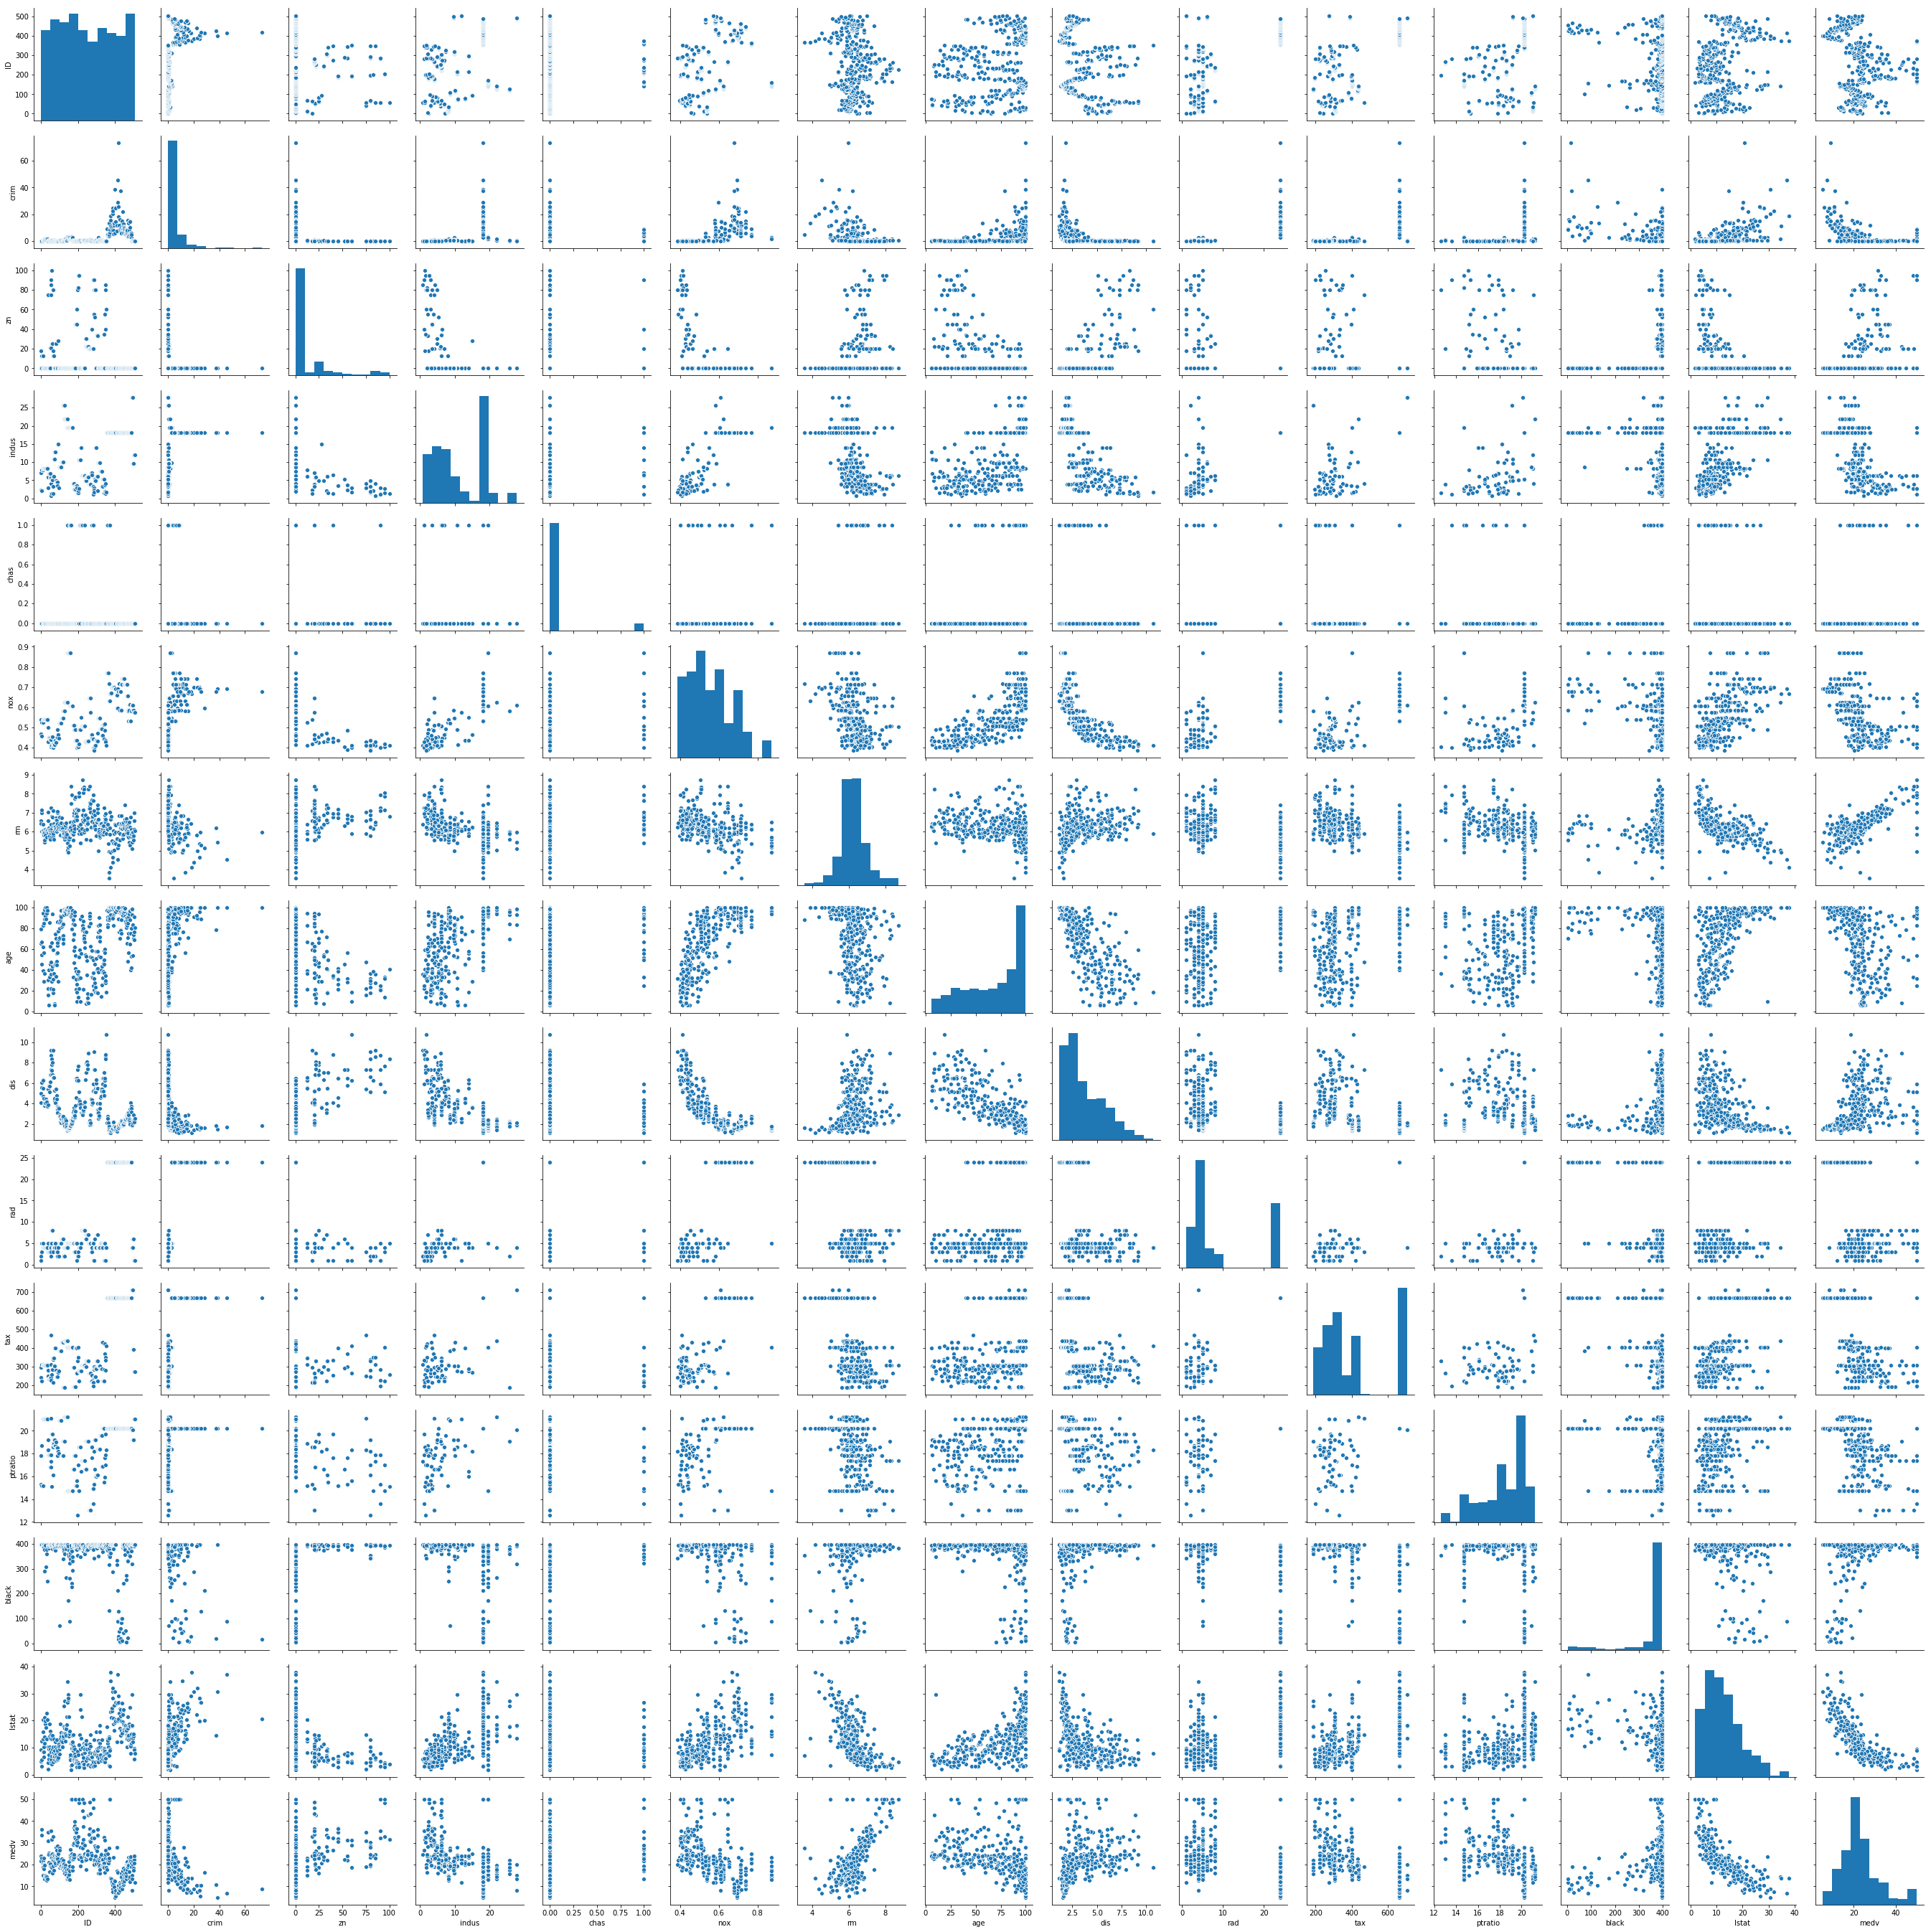

In [318]:
sns.pairplot(df_train)
plt.show()

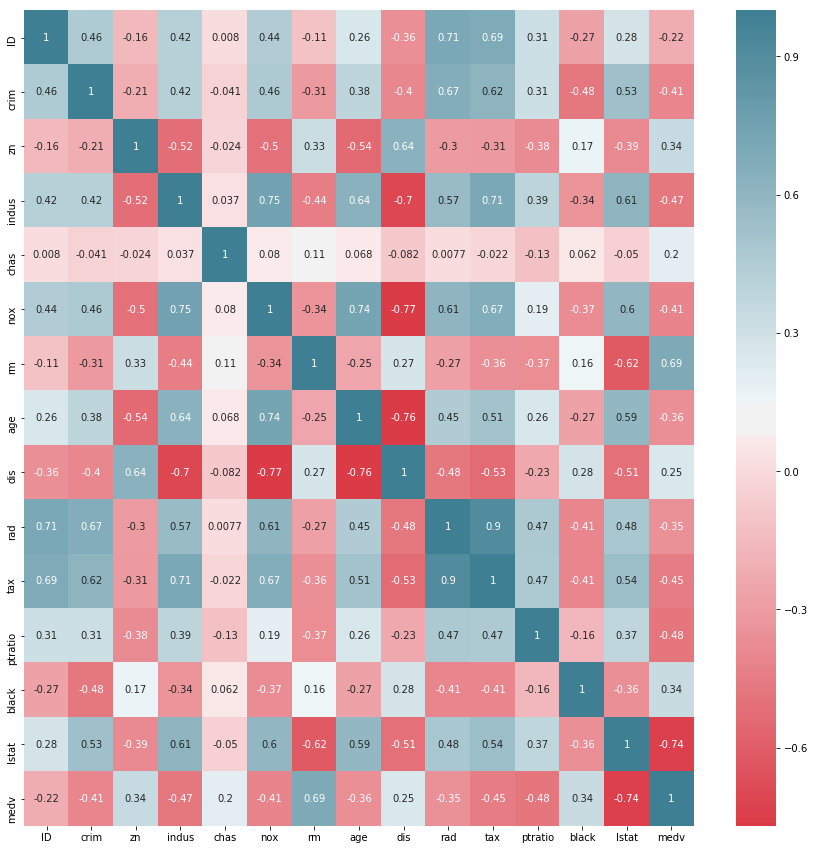

In [319]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(df_train.corr(), annot=True, cmap=cmap)
plt.show()

### 3. Data Preparation

In [332]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

x_train = df_housing.iloc[:,:-1]
y_train = df_housing.iloc[:,-1:]

scaler = StandardScaler().fit(x_train);
x_train[x_train.columns] = scaler.transform(x_train)

kbest = SelectKBest(k='all').fit(x_train, y_train)
best_var = pd.DataFrame(data = { 'Best Values' : kbest.scores_ }, index= x_train.columns).sort_values(by='Best Values', ascending =False).T
print('Best Predictions Variables: ')
display(best_var)

Best Predictions Variables: 


,LSTAT,CRIM,RM,NOX,AGE,TAX,INDUS,RAD,B,PTRATIO,ZN,DIS,CHAS
Best Values,5.752151,3.413923,2.675998,2.338995,2.329545,2.210056,2.15122,1.914649,1.818332,1.776251,1.698253,1.506687,1.102329


### 4. Model Creation & Evaluation

In [333]:
from sklearn import linear_model, tree, ensemble, neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

models_score = {}
models_score['LinearRegression']= cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv=kf ,scoring='neg_mean_squared_error')
models_score['Lasso']= cross_val_score(linear_model.Lasso(), x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
models_score['Ridge']= cross_val_score(linear_model.Ridge(), x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
models_score['Decision Tree'] = cross_val_score(tree.DecisionTreeRegressor(), x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
models_score['Extra Tree']= cross_val_score(tree.ExtraTreeRegressor(),x_train,y_train, cv=kf, scoring='neg_mean_squared_error')
models_score['Random Forest']= cross_val_score(ensemble.RandomForestRegressor(), x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
models_score['Bagging']= cross_val_score(ensemble.BaggingRegressor(),x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
models_score['AdaBoost']= cross_val_score(ensemble.AdaBoostRegressor(),x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
models_score['Gradient Boosting']= cross_val_score(ensemble.GradientBoostingRegressor(),x_train, y_train, cv=kf, scoring='neg_mean_squared_error')

In [334]:
df_score = pd.DataFrame(data=models_score)

In [337]:
df_score

,LinearRegression,Lasso,Ridge,Decision Tree,Extra Tree,Random Forest,Bagging,AdaBoost,Gradient Boosting
0,-9.286947,-8.568525,-9.205960,-16.516667,-18.164314,-13.681863,-12.479857,-9.615024,-10.341150
1,-14.151283,-9.392887,-14.020688,-12.194706,-34.698431,-4.967976,-5.346308,-8.859846,-4.921672
2,-14.073606,-7.527419,-13.886969,-14.014510,-19.885686,-5.431612,-5.409306,-3.622257,-15.713065
3,-35.206924,-58.182680,-35.304928,-57.824314,-73.443137,-25.248051,-22.979449,-19.261403,-15.934282
4,-31.885117,-32.689138,-31.752108,-17.454510,-24.945098,-10.874057,-11.254576,-12.703525,-11.470044
5,-19.835878,-44.189401,-19.817792,-41.887255,-75.316667,-25.176173,-22.321600,-46.122463,-12.986255
6,-9.947269,-13.957288,-9.816963,-12.425600,-15.466000,-7.865294,-10.425004,-16.247452,-7.932911
7,-168.375380,-147.236792,-167.718605,-94.601000,-107.328800,-95.562080,-93.246024,-86.684478,-78.772174
8,-33.329745,-47.110071,-33.235367,-79.203800,-20.154400,-27.250002,-48.011898,-22.070308,-18.410240
9,-10.960411,-9.799905,-10.777502,-37.327400,-26.105600,-15.883464,-11.856050,-16.681025,-14.193526


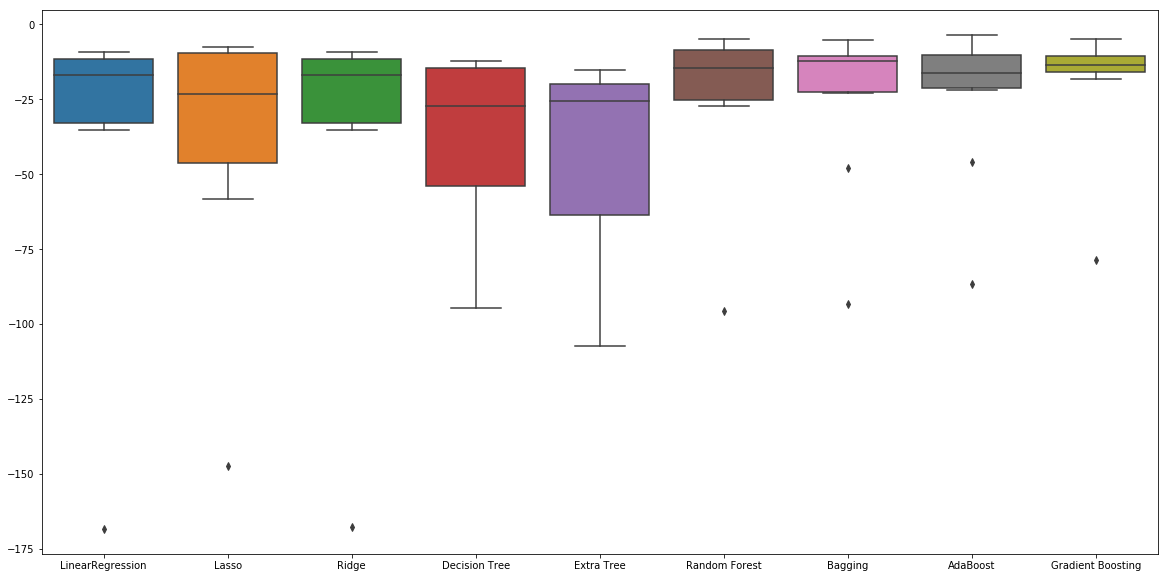

In [336]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_score)